<a href="https://colab.research.google.com/github/amol004/Google-Play-Store-EDA/blob/main/Capstone_project_Google_play_store_review_analysis_(EDA)_Notebook_%7BAmol_Thakur%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Google Play Store**
### **By Amol Thakur**


---



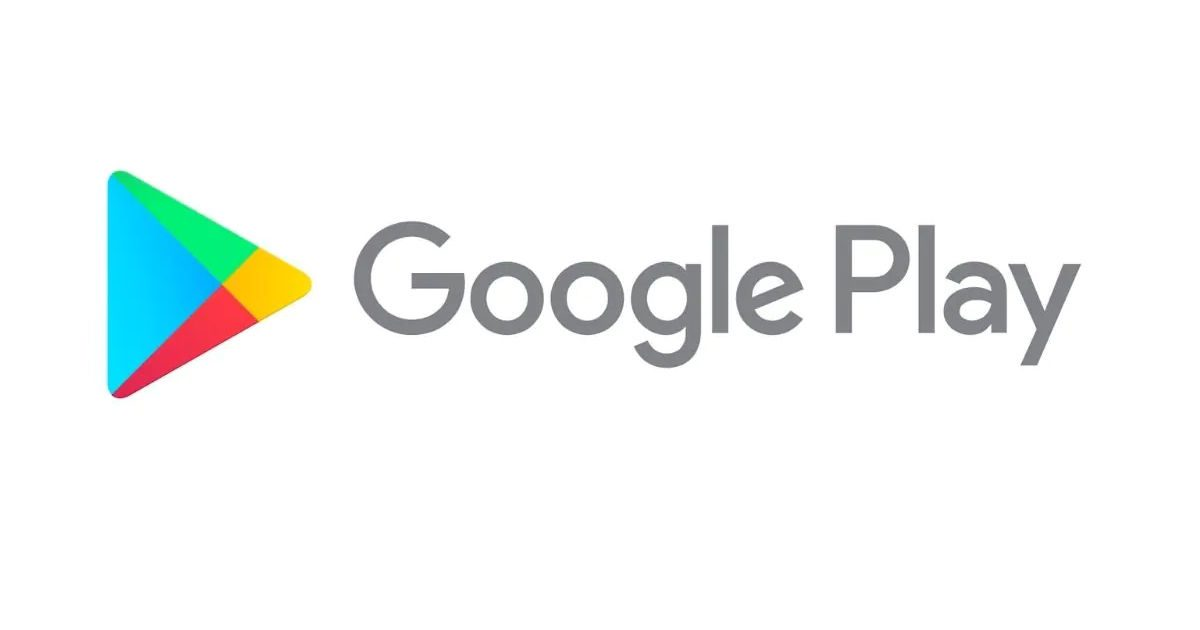



### **The Play Store applications data set(PlayStoreData.csv) offers a lot of promise to help app-making enterprises succeed.**
### **Each row in this collection contains values for its category, rating, size, and other attributes.**
### **Customer reviews of the Android apps are included in another dataset.(UserReviews.csv)**

# **There are basically 2 data sets that we will be working on in this project :**

**1. PlayStoreData.csv : contains information regarding Applications**

**2. UserReviews.csv : contains information regarding Reviews and Sentiments of users**




# **Let's have a look on our PlayStoreData.csv dataset and the features/information it holds :**


**App :- Name of the App.**

**Category :- The classification that the App belongs in.**

**Rating :- App's rating on playstore.**

**Reviews :- Number of reviews of the App.**

**Size :- Size of the App.**

**Install :- Number of Installs of the App.**

**Type :- Whether the App is free or paid.**

**Price :- Price of the app.**

**Content Rating :- Audience that the app should be targeting.**

**Genres:- Genre under which the App falls.**

**Last Updated :- Date when the App was last updated.**

**Current Ver :- Current Version of the Application.**

**Android Ver :- Minimum Android Version required to run the App.**






# **Now let's study the features of our 2nd dataset which is UserReviews.csv :**

**App : Name of the App.**

**Translated_Review : Opinions of people regarding a specific application**

**Sentiment : Weather the opinion/review of user is negative/positive/neutral**

**Sentiment_Polarity: Defines the orientation of the expressed sentiment(between -1(negative) to 1(positive) or 0(neutral)**

**Sentiment_Subjectivity : Refers to the degree to which a person's review is related to the App (lies between 0 to 1)**


# **The data from Play Store applications has a huge potential to propel app-making companies to success. For developers to work on and take the Android market, actionable insights may be derived.**

# **Therefore, without further ado, let's start our analysis to get some insightful conclusions.**

# **Part 1 : Importing all the necessary packages and libraries required for our EDA** 



---







In [1]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd 
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno 
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics of our project
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Reading our first csv file (PlayStoreData.csv) and storing it in a variable play_df
play_df = pd.read_csv('/content/drive/MyDrive/Google Playstore dataset/Play Store Data.csv')


In [4]:
# Reading our 2nd csv file (UserReviews.csv) and storing it in a variable reviews_df
reviews_df = pd.read_csv('/content/drive/MyDrive/Google Playstore dataset/User Reviews.csv')

In [5]:
# Analyzing top 5 rows of our play_df dataset using .head()
play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Analyzing top 5 rows of our reviews_df dataset using .head()
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
# Checking the data types of every column in our play_df dataframe using .info()
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **# Here we can aslo notice that our play_df dataframe has 10841 rows and 13 columns**

In [51]:
# Retriving information about our 2nd dataset i.e reviews_df
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## **# Reviews_df contains 64295 rows and 5 columns**

# **For now let's just focus on our 1st dataset i.e play_df and try finding some useful insights**



---



# **Part 2 : Performing Data Cleaning , following operations would be used :**

## 1. Analyzing or handling null/missing values if required
## 2. Finding Outliers
## 3. Correcting Datatypes
## 4. Filtering unnecessary values
## 5. Removing unnecessary symbols ($,+,M etc)
## 6. Removing Duplicate values
## 7. Transforming values from one format to other (from Kb to Mb)


---






















# Analysing and visualizing Null/Missing values

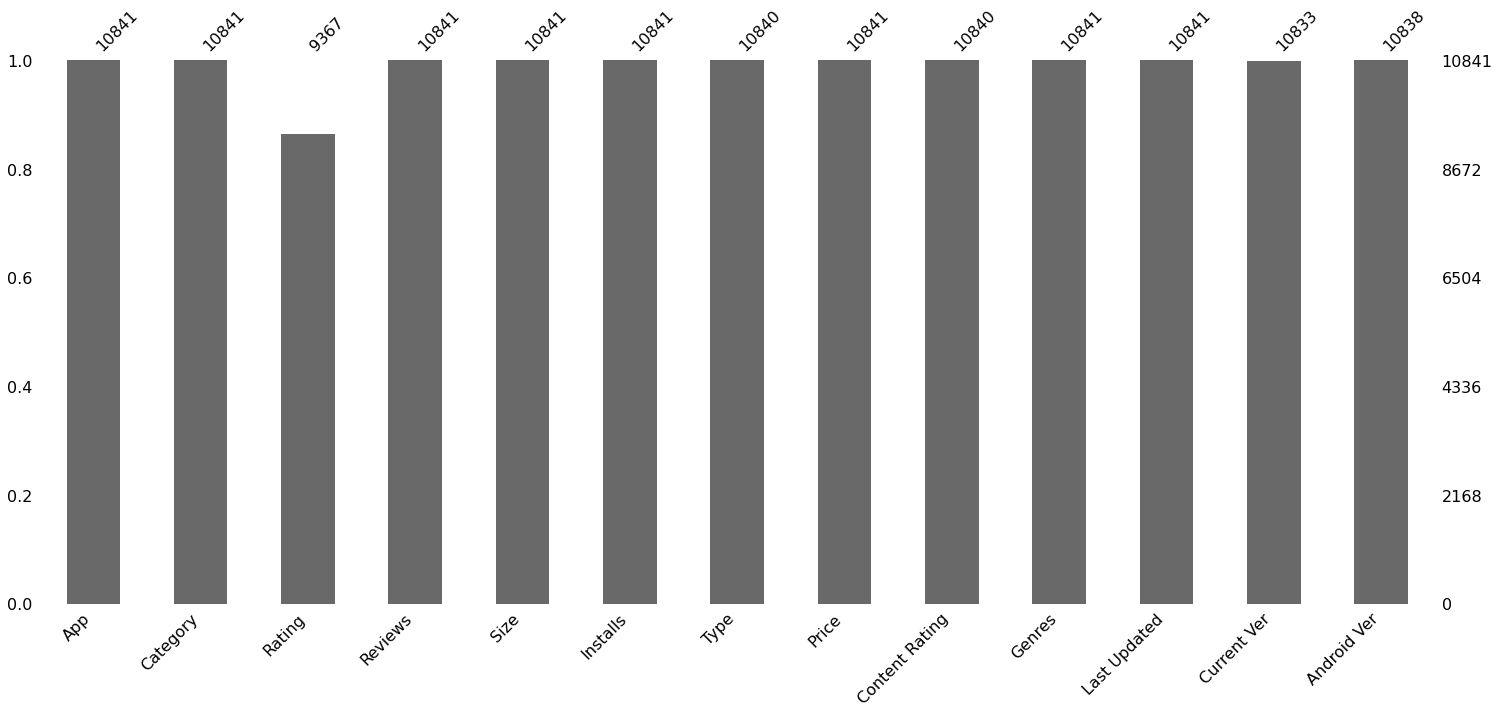

In [8]:
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(play_df);

<Figure size 720x576 with 0 Axes>

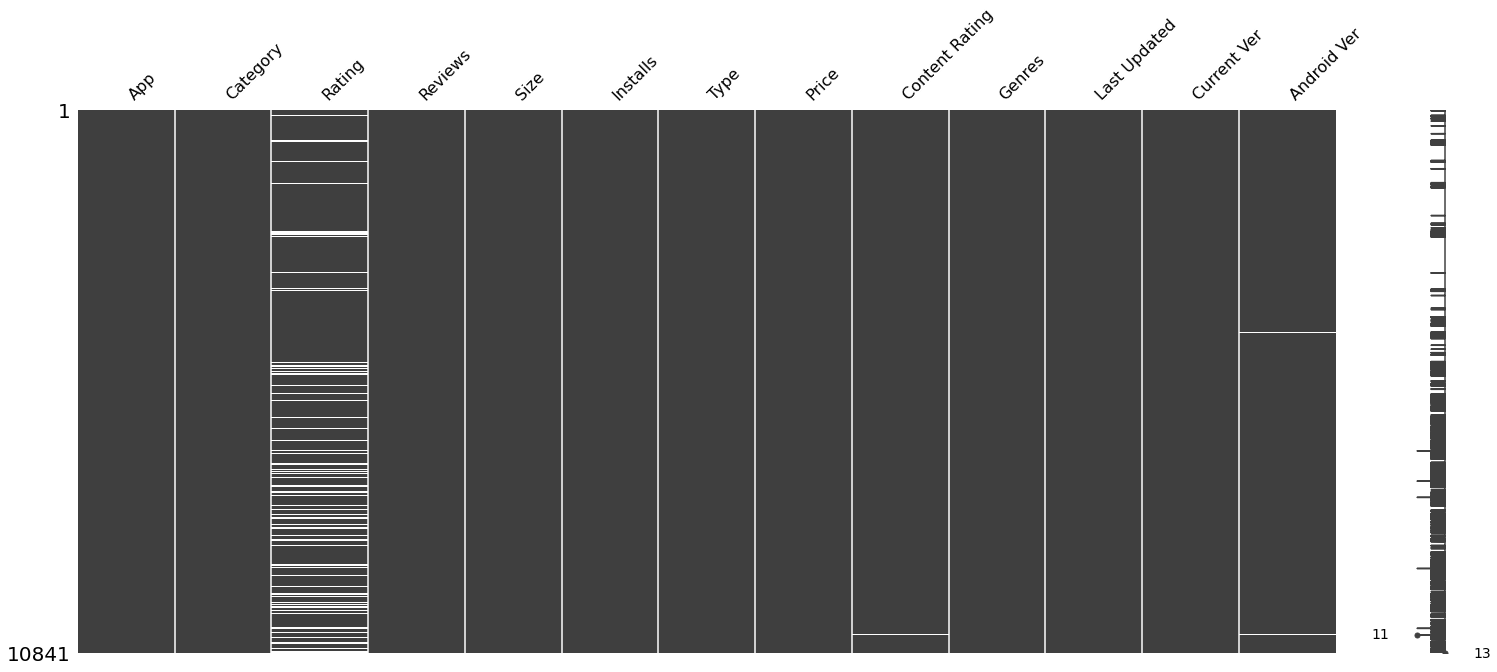

In [9]:
# We can also use the matrix method for performing the above task (the horizontal white lines represents missing values present in columns )
# It seems like there aren't much missing values present in our dataframe except for the column 'Rating'
plt.figure(figsize=(10,8))
msno.matrix(play_df);

In [10]:
#checking the amount of null values present in every column of our playstore dataframe by combining .isnull() and .sum() methods
play_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
# finding the percentage of null values present in every column of play_df
play_df.isnull().sum()/len(play_df)*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

# Outliers Detection and Removal

In [12]:
# performing a check for any possible outliers by using unique() method
# here we can see a value(19.0) which is far off from max possible value(5.0) which an app can get
play_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

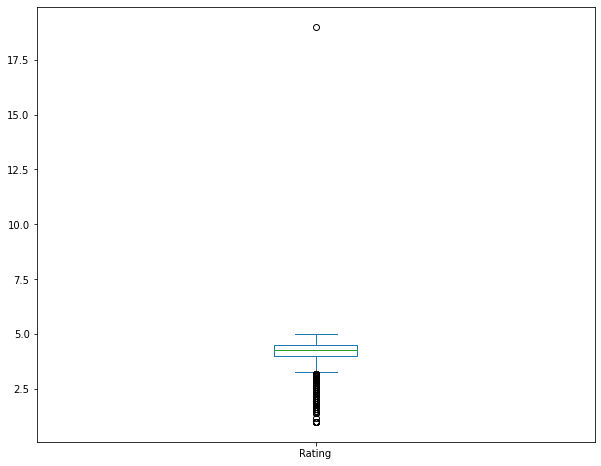

In [13]:
# confirming the above outlier using box plot 
plt.figure(figsize=(10,8))
play_df.Rating.plot(kind='box');

In [14]:
# Removing the above outlier form the column Rating
play_df.drop(play_df[play_df.Rating>5.0].index,inplace=True)

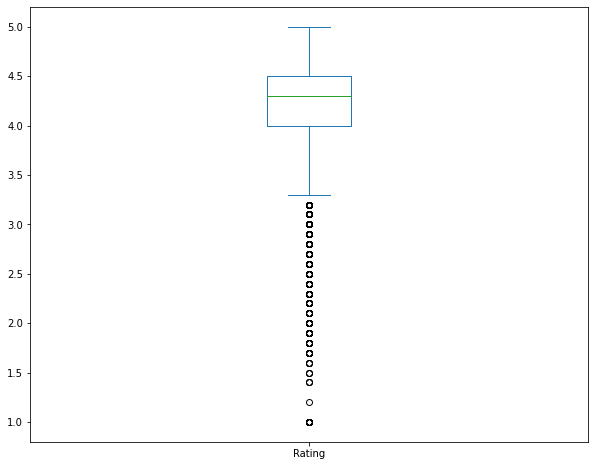

In [15]:
# Performing a check just to ensure that the outlier is removed
plt.figure(figsize=(10,8))
play_df.Rating.plot(kind='box');
# Here we can see that we have sucessfully removed the outlier from the required column


# Removing duplicate values

In [16]:
# Dropping duplicate values present in our dataframe meanwhile retaining the first value
play_df=play_df.drop_duplicates(keep='first')

In [17]:
# Dropping row with 0 Installs using .drop() as it is an outlier and it is not possible for an app to have 0 installs 
# Further storing in play_df to update our dataframe
play_df=play_df.drop(play_df[play_df.Installs == '0'].index)
play_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Converting columns into numeric type from str and removing unnecessary signs('$' , '+' , 'M' , 'K' , ',' ) attatched to the values present in our columns (Correcting Datatypes and Removing unnecessary symbols)

In [18]:
# Changing the datatype of column named "Price" to float meanwhile also replacing '$' symbol with empty string
play_df['Price']= play_df['Price'].str.replace('$','').astype('float64')

In [19]:
# Changing the datatype of column 'Rating' to float 
play_df['Rating']=play_df['Rating'].astype('float64')

In [20]:
# Converting the datatype of column 'Installs' to int and also replacing ("+" and ",") with empty string
play_df['Installs']=play_df['Installs'].str.replace('+','')
play_df['Installs']=play_df.Installs.str.replace(',','').astype('int')

In [21]:
# Changing datatype of 'Size' column and replacing string('Varies with device') with np.nan to replace this string with NaN value
# We will not change the datatype of this column for now as there are some symbols which needs to be removed 
# And there are some values too which needs to be converted from Kb to Mb
# we will remove and convert them with the help of a function further in our journey
play_df['Size']=play_df.Size.str.replace('M','')
play_df['Size']=play_df.Size.replace('Varies with device',np.nan)

In [22]:
# Updating datatype of column 'Reviews' to int
play_df['Reviews']=play_df.Reviews.astype('int')

In [23]:
# Changing the data type of Last Updated column from 'object' to Datetime
play_df['Last Updated'] = pd.to_datetime(play_df['Last Updated'])

In [24]:
# Let's rename our 'Price' column to 'Price($)' and update the value in our play_df dataframe
play_df=play_df.rename(columns={'Price':'Price($)'})

In [25]:
# Writing a function to remove 'k' from all the values present in 'Size' column
def remove(i):
        if i[-1]=='k':
            return float(i[0:-1])/1000  #converting values from 'Kb' to 'Mb' by dividing all the values by 1000
        else :
            return i

In [26]:
# Changing the datatype of 'Size' column to str so that we can apply the above function as it is only applicabe for a value having datatype str
play_df.Size=play_df['Size'].astype('str')


In [27]:
# Applying the function remove() that we created , to the column 'Size' so that we can have pure numeric values
play_df["Size"]=play_df["Size"].apply(lambda x: remove(x)) # using .apply() method with the help of lambda function to filter values in column 'Size'
# we can also use .map() here to perform the same task

In [28]:
# Now let's just verfiying weather we have got the desired results or not
play_df.Size.unique()
# It seems that all our values are puerly numeric now , so let's change the datatype of this column

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', 'nan',
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', 0.201, '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       0.023, '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       0.079, '8.4', 0.118, '44', 0.695, '1.6', '6.2', 0.018, '53', '1.4',
       '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8',
       '70', '6.9', '9.3', '10.0', '8.1', '36',

In [29]:
# Changing the datatype of column 'Size' to float 
play_df['Size']=play_df['Size'].astype('float')

In [30]:
# Renaming the column as all the values now are in 'Mb'
play_df=play_df.rename(columns={'Size':'Size(in Mb)'})

In [31]:
# Let's have a final look at our updated dataframe before moving further  
play_df.head()

,App,Category,Rating,Reviews,Size(in Mb),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [32]:
# Here we can see that the datatype of our columns have changed to 'float64','int64' and 'datetime' from 'object' as we desired
play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10356 non-null  object        
 1   Category        10356 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10356 non-null  int64         
 4   Size(in Mb)     8831 non-null   float64       
 5   Installs        10356 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price($)        10356 non-null  float64       
 8   Content Rating  10356 non-null  object        
 9   Genres          10356 non-null  object        
 10  Last Updated    10356 non-null  datetime64[ns]
 11  Current Ver     10348 non-null  object        
 12  Android Ver     10354 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


### **The 2nd part of our analysis ends here which was Data Cleaning.**
### **Our Data is now good enough to draw some insights from it , so let's move ahead in our journey.**



---


# **Part 3 : Data Visualization**







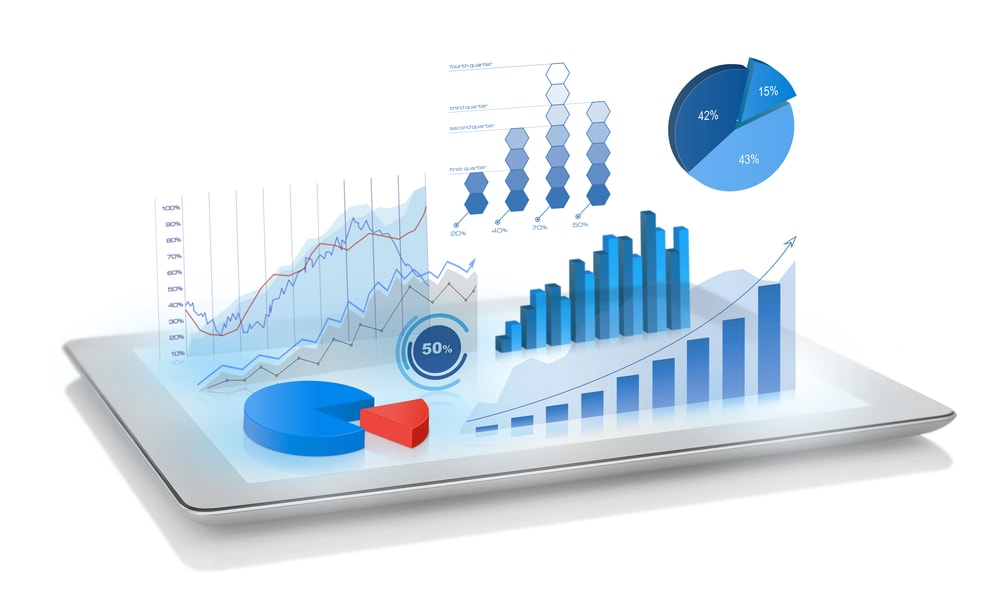





### **Before moving any further with our analysis the first question that we would like to know is what do we actually mean by the term 'data visualization' ?**
### **The answer is simple,Data visualisation is a method of presenting information graphically, emphasising patterns and trends in data, and assisting the reader in gaining rapid insights as not all of us might be good in understanding complex set of codes.**

# **Visualizations used in this project:**
### 1.Violin Plot       

###2.Hist Plot

###3.Count Plot

###4.Bar Graph

###5.Pie Chart

###6.Kde Plot

###7.Scatter Plot

###8.Line Graph

###9.Correlation Heatmap

###10.Box Plot

###11.Dist Plot

###12.Pair Plot


---



# **Violinplot**
**A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.**

## **Ratings Distribution**

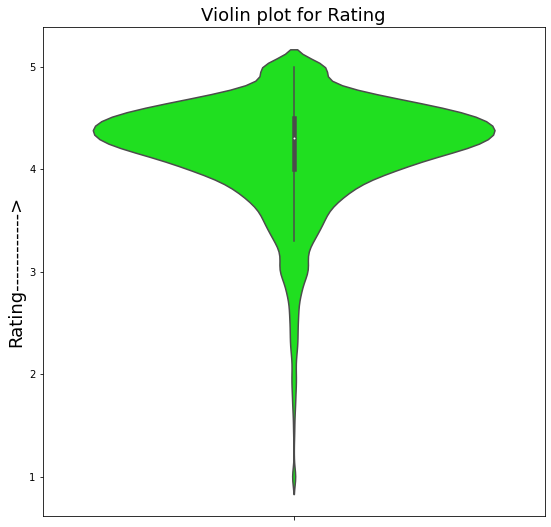

In [33]:
# Using violin plot to study the distribution of Ratings
plt.figure(figsize=(9,9)) # defining figure size
sns.violinplot(y="Rating",data=play_df ,color='lime') # using seaborn to plot violinplot by passing necessary arguments
plt.ylabel("Rating------------>", fontsize=18) # value to be displayed at Y-axis
plt.title("Violin plot for Rating",fontsize=18); # Title




**Here violin plot is used to study the distribution of ratings, from above plot we can conclude that most of the ratings are between 4.4 and 4.3 and that's where the median also lies, because of univariate analysis we have used violin plot here.**






In [34]:
# Let's verify the above graph by printing top 5 most common ratings given by users
play_df.Rating.value_counts().head().reset_index().rename(columns={'index':'Rating','Rating':'count'})

,Rating,count
0,4.4,1032
1,4.3,1016
2,4.5,977
3,4.2,888
4,4.6,768




---



# **Histplot**

**A histogram, a traditional visual representation tool, counts the number of data that fit into discrete bins to show the distribution of one or more variables.**

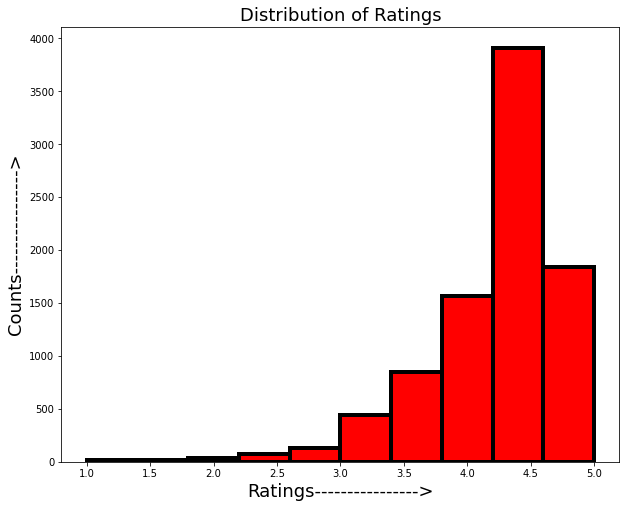

In [35]:
# Another way of finding out distribution of rating is to plot a histplot
plt.figure(figsize=(10,8)) # figure size
plt.hist(play_df['Rating'],color="red", ec="black",lw=4); # command to initialize histplot using matplotlib
plt.xlabel("Ratings---------------->",fontsize=18) # x label
plt.ylabel("Counts---------------->",fontsize=18) # y label
plt.title("Distribution of Ratings",fontsize=18); # title



**The hist plot above is also used for univariate analysis just like violin plot and it's just another way of doing the same task that we performed using violin plot**



---



# **Countplot**

**The countplot show the counts of observations using bars.**

## **Number of Apps v/s number of installs**

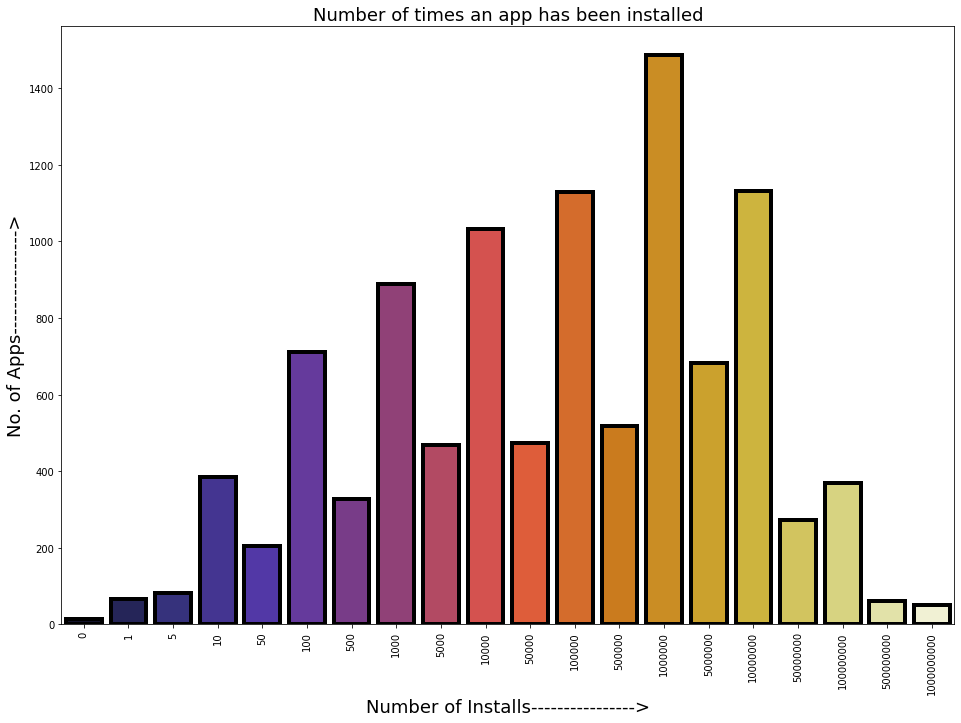

In [36]:
# Finding out how many times an app has been installed using countplot
plt.figure(figsize=(16,11)) # figure size
sns.countplot("Installs",data=play_df,palette="CMRmap",ec="black",lw=4) # initializing countplot using seaborn and passing necessary arguments
plt.xticks(rotation=90) # to rotate values on X-axis so that they dont collide with each other
plt.xlabel("Number of Installs---------------->",fontsize=18) # X-axis label
plt.ylabel("No. of Apps---------------->",fontsize=18) # label at Y-axis
plt.title("Number of times an app has been installed",fontsize=18); # Title







**Here it shows the number of apps on Y axis and the number of times those apps have been installed on X axis**

**The first major observation on y axis is 200 which is coinciding with the value 50 on x axis, this means that there are 200 apps which have been downloaded more than 50 times that are present in our dataset.**

**Method of analysis used here is also univariate.**

**The highest value shows that there are near about 1500 apps that have been installed more than a million times**



---



# **Barplots**

**Barplot demonstrates the connection between a categorical and a numerical variable. The categorical variable's entities are each represented by a bar. The bar's size corresponds to its numerical value.**

## **Top 20 most expensive apps**

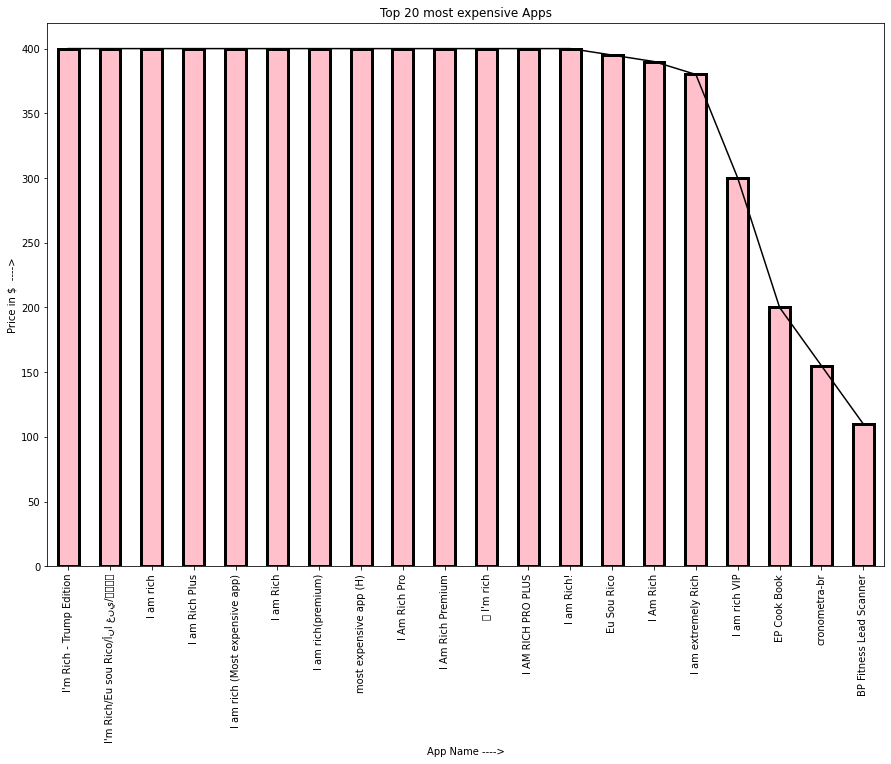

In [37]:
# Finding out top 20 most expensive apps using barplot
plt.rcParams['figure.figsize']=(15,10) # figure size
bb=play_df.groupby('App')['Price($)'].mean().sort_values(ascending=False).head(20)
# performing bivariate analysis using groupby on column 'App' and 'Price'
# .mean() method is used to generate average price values
cc=pd.DataFrame(bb) # transforming our values into a seperate dataframe
bb.plot(color='black') # command to initalize black line present over bars 
bb.plot(kind='bar',color=['pink'],linewidth=3,edgecolor='black') # command to initalize bar plot using matplotlib
plt.title('Top 20 most expensive Apps') #title
plt.ylabel('Price in $  ---->') # y axis label
plt.xlabel('App Name ---->'); # x axis label

In [38]:
# Let's justify above bar graph by printing prices of top 20 most expensive apps
cc.reset_index()

,App,Price($)
0,I'm Rich - Trump Edition,400.00
1,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
2,I am rich,399.99
3,I am Rich Plus,399.99
4,I am rich (Most expensive app),399.99
5,I am Rich,399.99
6,I am rich(premium),399.99
7,most expensive app (H),399.99
8,I Am Rich Pro,399.99
9,I Am Rich Premium,399.99




**Here we can notice a trend that a large proportion of the top 20  most expensive apps have kind of similar names and price , that might be because of same functionality or origins.**

**Initially the graph is linear but at 14th obeservation it starts declining**






## **Most preferred categories**

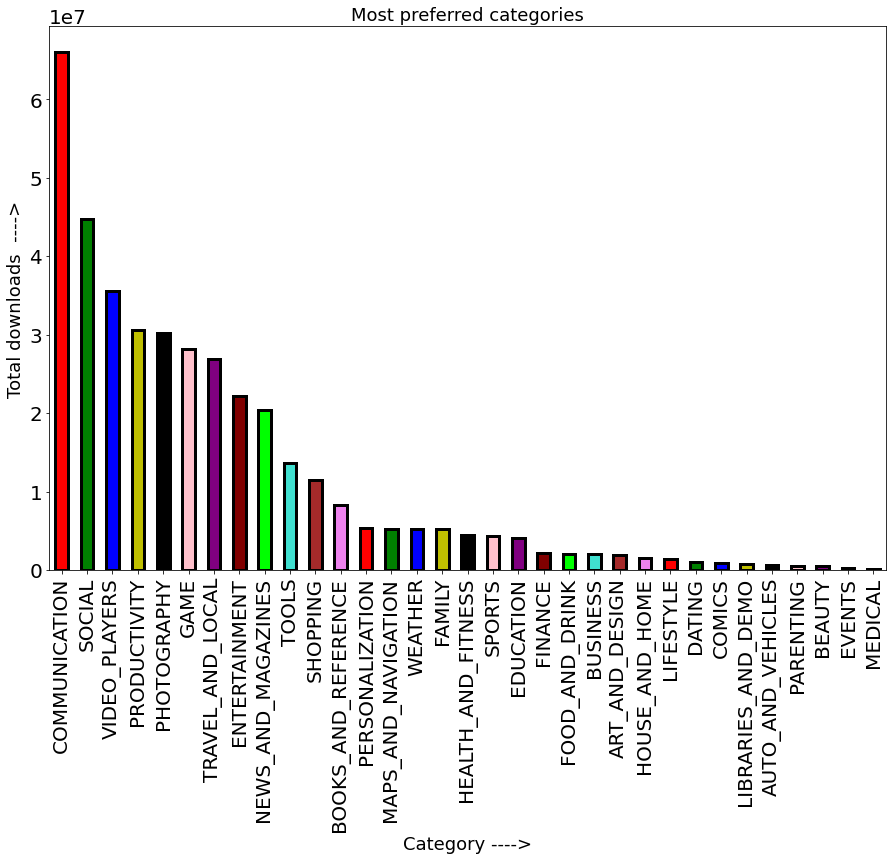

In [81]:
# Another visualization in which we will find out the most average downloaded categories using barplot
plt.rcParams['figure.figsize']=(15,10) # figure size
play_df.groupby('Category')['Installs'].mean().sort_values(ascending=False).plot(kind='bar',color=['red','g','b','y','black','pink','purple','maroon','lime','turquoise','brown','violet'],edgecolor='black',linewidth=3)
# Applying groupby on 'Category' and 'Installs' columns to find out the average installs per category
plt.xticks(rotation=90) # rotating x axis labels
plt.title('Most preferred categories',fontsize=18) # title
plt.ylabel('Total downloads  ---->',fontsize=18) # y axis label
plt.xlabel('Category ---->',fontsize=18); #x axis label 

**Through bivariate analysis here we can notice that the most downloaded category is COMMUNICATION  as people love to communicate via video calls , texts and calls.**

**Now let's find out what are the most downloaded apps that are present in COMMUNICATION category so we can have an idea why this category tops the charts**

In [40]:
# Top 10 apps in COMMUNICATION category that are preferred the most by users
pp=play_df.groupby(['Category','App'])['Installs'].mean().sort_values(ascending=False).reset_index()
# Using Multivariate analysis by performing operation on three columns at once
pp=pd.DataFrame(pp) # creating a dataframe for the above values
jj=pp[pp['Category']=='COMMUNICATION'] # filtering values that comes under the category COMMUNICATION
jj.head(10).reset_index().drop(['index'],axis=1) # top 10 Apps

,Category,App,Installs
0,COMMUNICATION,Skype - free IM & video calls,1.000000e+09
1,COMMUNICATION,Hangouts,1.000000e+09
2,COMMUNICATION,Gmail,1.000000e+09
3,COMMUNICATION,Google Chrome: Fast & Secure,1.000000e+09
4,COMMUNICATION,WhatsApp Messenger,1.000000e+09
5,COMMUNICATION,Messenger – Text and Video Chat for Free,1.000000e+09
6,COMMUNICATION,LINE: Free Calls & Messages,5.000000e+08
7,COMMUNICATION,Google Duo - High Quality Video Calls,5.000000e+08
8,COMMUNICATION,imo free video calls and chat,5.000000e+08
9,COMMUNICATION,UC Browser - Fast Download Private & Secure,5.000000e+08


**So here are the top 10 most downloaded apps in COMUNICATION category.**

**Most of the apps that are present in our Top 10 list comes pre installed in alot of devices which might be the reason for these apps to have near about a billion installs.**






## **Maximum average ratings for each category**

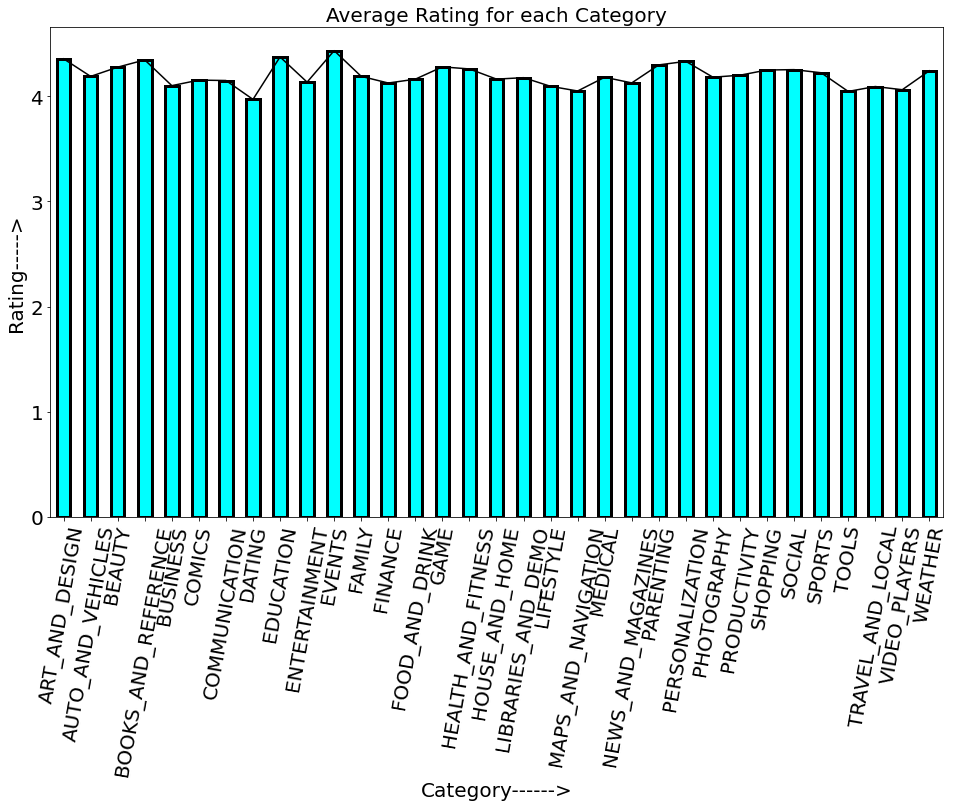

In [80]:
# Finding out Maximum Average rating for each Category
hh=play_df.groupby('Category')['Rating'].mean()
plt.rcParams['figure.figsize'] = (16,9)
hh.plot(color='black')
hh.plot(kind='bar',color=['cyan'],edgecolor='black',linewidth=3)
plt.title('Average Rating for each Category',fontsize=20)
plt.xlabel('Category------>',fontsize=20)
plt.ylabel('Rating----->',fontsize=20)
plt.xticks(rotation=80);

In [79]:
# Let's have a more clear idea about the above bar graph through numbers
hh.sort_values(ascending=False).reset_index()

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.375969
2,ART_AND_DESIGN,4.358065
3,BOOKS_AND_REFERENCE,4.347458
4,PERSONALIZATION,4.333871
5,PARENTING,4.300000
6,GAME,4.281285
7,BEAUTY,4.278571
8,HEALTH_AND_FITNESS,4.261450
9,SOCIAL,4.254918


**Even though COMMUNICATION is the most installed category but when it comes to ratings the stats says otherwise, the bar graph above clearly shows that the apps with category EVENTS tops the chart with highest average rating of 4.43 .**

**The lowest rated category is DATING with an average rating of 3.97**



---



# **Piecharts**

**A pie chart, sometimes known as a circle chart, is a circular statistical visual that shows numerical percentage through slices.It's one of the easiest methods to perform univariate and bivariate analysis.**


## **Content rating with maximum average ratings**

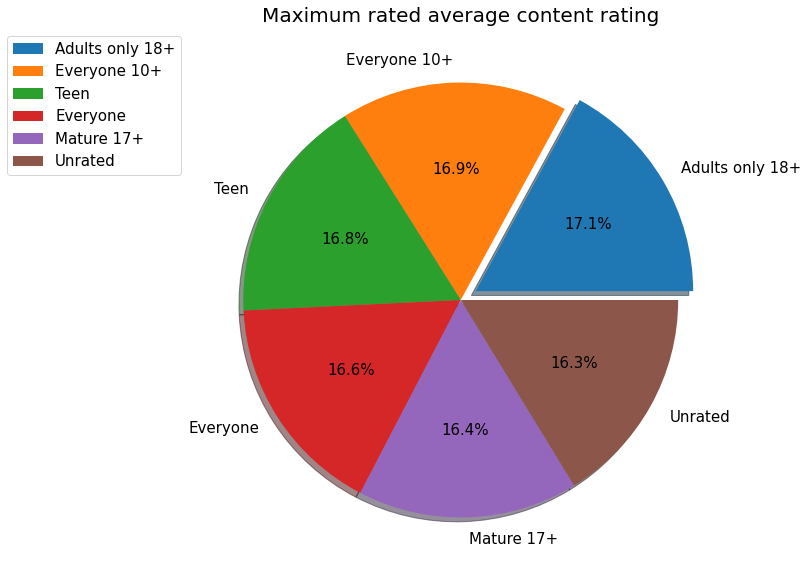

In [41]:
# Finding out content rating with maximum average ratings using pie chart
plt.rcParams['figure.figsize']=(10,10) # figure size
plt.rcParams['font.size'] = 15 # font size
ee=play_df.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False)
# Performing bivariate analysis using groupby to find out mean ratings for our content ratings and sorting them in decending order
nn=pd.DataFrame(ee) # creating a dataframe for values in ee variable
myexplode = [0.08, 0, 0, 0,0,0] # Used to highlight/seperate slices from rest of the slices
plt.title('Maximum rated average content rating',fontsize=20) # Title
plt.pie(ee,labels=['Adults only 18+','Everyone 10+','Teen','Everyone','Mature 17+', 'Unrated'],explode=myexplode,autopct='%1.1f%%',shadow=True)
# Deploying piechart using matplotlib
plt.legend(bbox_to_anchor=(0,1)); # Used to display and adjust the position of information box that is present on the left side of this pie chart


**Above pie chart shows that content rating 'Adults only 18+' is highest rated among all other categories, but this does not mean that it is the most downloaded content rating, data analysis can be sometimes misguiding or tricky isn't it ?.So let's find out what's the most downloaded content rating is.**

In [42]:
# Verifying above pie chart 
nn

,Rating
Content Rating,
Adults only 18+,4.300000
Everyone 10+,4.254167
Teen,4.238845
Everyone,4.180817
Mature 17+,4.124331
Unrated,4.100000


## **Now let's find out what are the most downloaded content ratings**

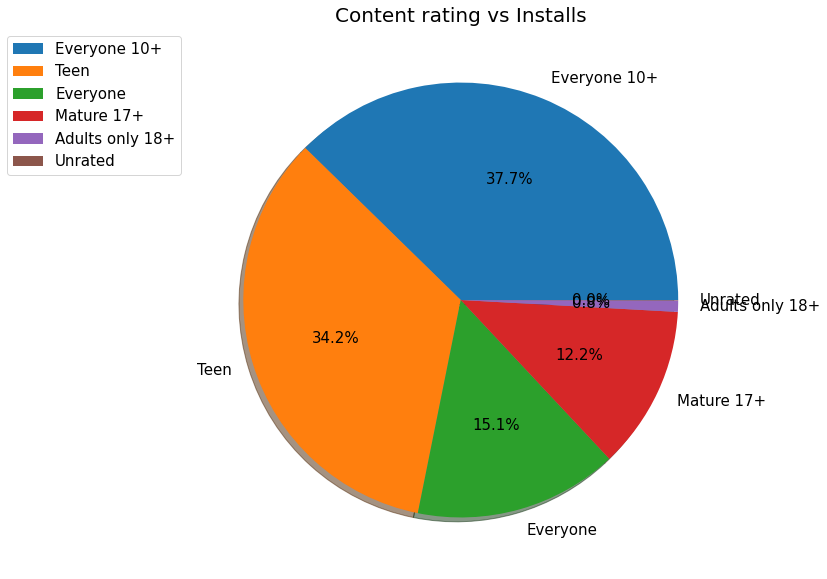

In [43]:
# Finding out what content rating have been downloaded the most using pie chart
plt.rcParams['figure.figsize']=(10,10) # figure size
plt.rcParams['font.size'] = 15 # font size
# Performing bivariate analysis on columns 'Content Rating' and 'Installs' using groupby to find average installs per content rating and sorting values in decending order
ab=play_df.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)
# Deploying pie chart using matplotlib and passing required arguments 
plt.pie(ab,labels=['Everyone 10+','Teen','Everyone','Mature 17+','Adults only 18+', 'Unrated'],autopct='%1.1f%%',shadow=True)
plt.title('Content rating vs Installs',fontsize=20) # Title
plt.legend(bbox_to_anchor=(0,1)); # Used to display and adjust the position of information box that is present on the left side of this pie chart

**The above pie chart shows that the most downloaded content rating is "Everyone 10+" as it aquires 37.7% of area in pie chart , it could be a very useful information for App Devs as they would focus more on building apps that falls in this content rating.**

**We can also notice that content ratings "Unrated" and "Adults only 18+" are the least downloaded categories , this is a bit surprising because of the fact that "Adults only 18+" was the highest rated content rating in our previous analysis**

In [44]:
ab.reset_index()

,Content Rating,Installs
0,Everyone 10+,2.976402e+07
1,Teen,2.697930e+07
2,Everyone,1.195772e+07
3,Mature 17+,9.598874e+06
4,Adults only 18+,6.666667e+05
5,Unrated,2.525000e+04


## **Analysing Free v/s Paid apps**

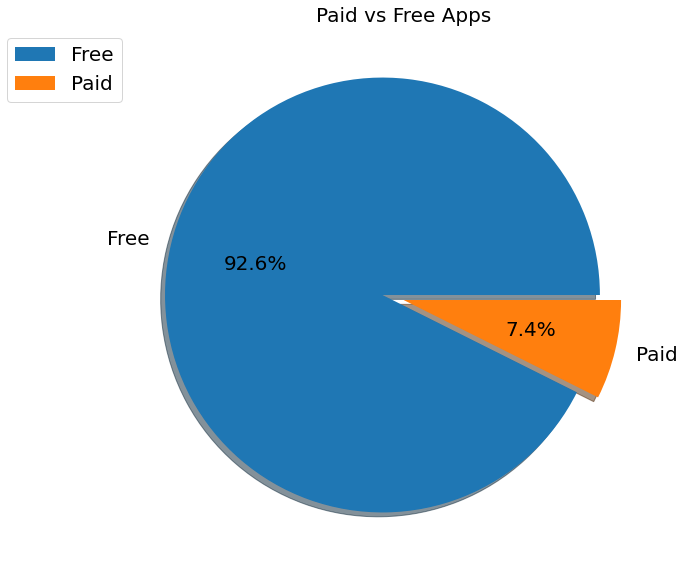

In [45]:
# Let's know about the apps which are free or paid
bb=play_df.Type.value_counts() # counting number of free and paid apps
plt.rcParams['font.size'] = 20 # font size
plt.rcParams['figure.figsize'] = (10,10) # figure size
plt.pie(bb,labels=['Free','Paid'],autopct='%1.1f%%',explode=[0.1,0],shadow=True)  # autopct is used to display percentages on pie chart
plt.title('Paid vs Free Apps',fontsize=20) # title
plt.legend(bbox_to_anchor=(0,1)); # adjusting the position of information box


**The vast majority of apps present on google play store are free as we can see from above piechart ,Free apps(92.6%) are domaniting Paid apps(7.4%) because users prefer apps that are free, it's quite understandable from here why devs focus more on building free apps rather than paid.**






In [46]:
# Number of free vs paid apps
bb=pd.DataFrame(bb)
bb.rename(columns={'Type':'count'})

,count
Free,9591
Paid,765


----

# **Kdeplot**

**Kdeplot is a Kernel Distribution Estimation Plot that displays the probability density function of continuous or non-parametric data variables, we can plot for both univariate and multivariate data sets.**

## **Rating distribution for Free and Paid Apps**

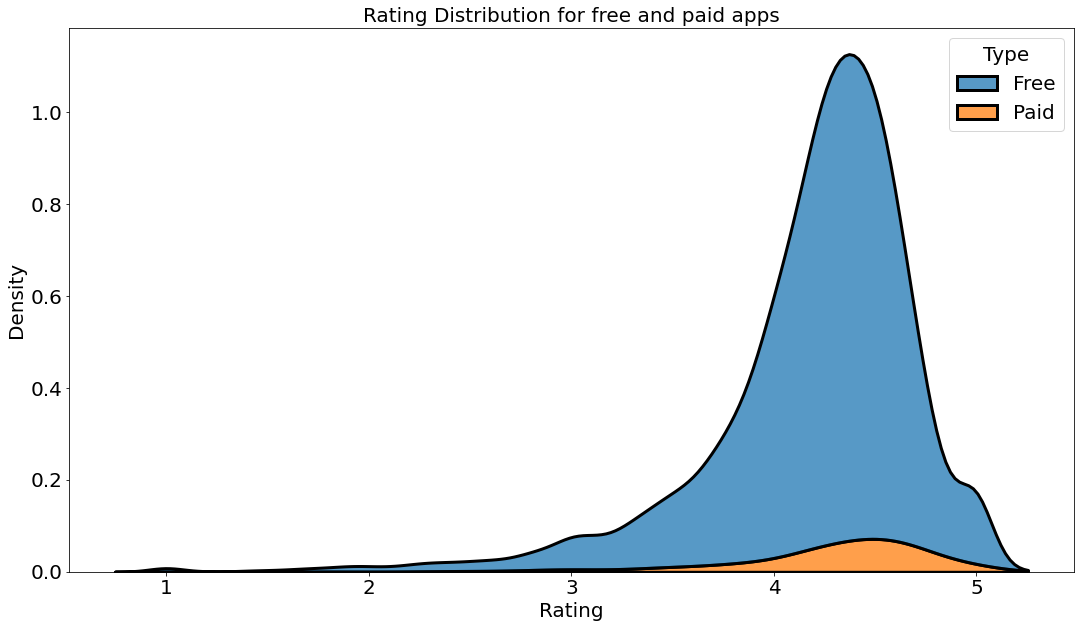

In [47]:
# Understanding the rating distribution for Free and Paid Apps with the help of kdeplot 
plt.rcParams['figure.figsize'] = (18,10)# figure size
# Initalizing kdeplot using seaborn using .kdeplot() function and forming analysis on the basis of 'Type' column using 'hue' argument
# both the plots are stacked togther using (multiple="stack") argument
sns.kdeplot(data=play_df, x="Rating", hue="Type",multiple="stack",edgecolor='black',lw=3)
plt.title('Rating Distribution for free and paid apps',fontsize=20); #title



**From the above kdeplot it's clear that users have rated free apps more than paid ones as the rating density of free apps is much more than that of paid apps.**

**But there's always two sides of a coin and not always quantity equals quality , the range of ratings for free apps starts from 1 and ends at 5 which means there are all sorts of negative and positive ratings meanwhile in case of paid apps the range starts from 3 and ends at 5 , this means that users of paid apps are much more satiesfied as compared to users of free apps.**



---



# **Scatterplots**

**Several dots are placed on a horizontal and vertical axis to form a scatter plot. In statistics, scatter plots are crucial because they may demonstrate the degree of connection, if any, between two variables or observations.**

## **Relation between Size and Ratings**

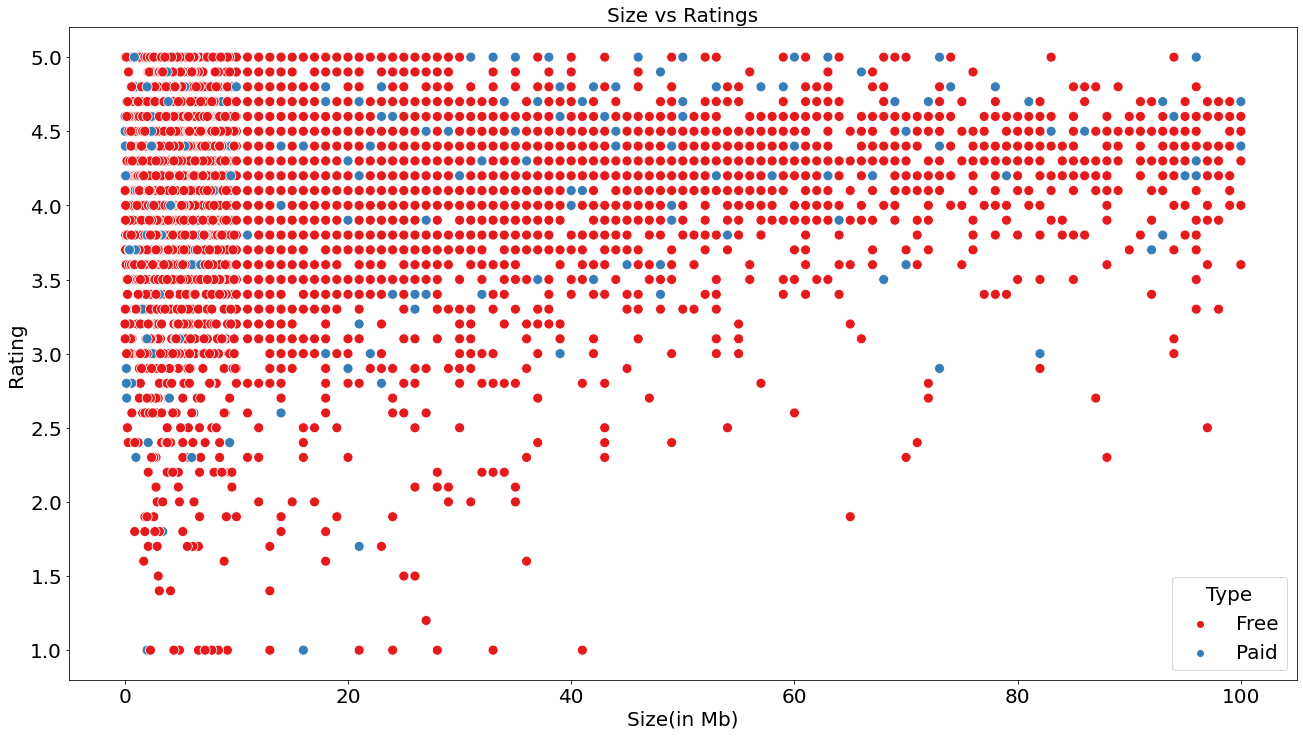

In [58]:
# plotting scatter plot for Size vs Ratings
plt.rcParams['figure.figsize'] = (22,12)
sns.scatterplot(x='Size(in Mb)', y='Rating', hue='Type', data=play_df, palette='Set1',s=100)
plt.title('Size vs Ratings',fontsize=20);


**Above scatterplot shows the correlation between size and ratings and how these two affects each other.**

**As we notice when the size of an app increases the number of ratings or density of rating decreases that's because users avoid installing apps with big size and prefer using apps with smaller size to save data or storage on their phones.**

**After 40mb the rating density is decreasing which indicates in lack of users or lack of downloads/installs.**

**In case of paid apps the rating density is also slightly decreasing after 50mb which indicates that even paid users don't like apps that are big in size**

**One more thing that should be noted is that the apps which are low rated(from 1-3 stars) are generally lower than 40mb, as the size increases the ratings also improves even though the rating density decreases.**



---


## # Due to high variance in "Installs" column we are unable to establish a relation between 'Size' and 'Installs'

## To remove this high variance we will create a new column "Normalized_Installs" which will store normalized values with low variance using log so that a relation could be established 



---


In [49]:
# Using log to remove high variance
play_df['Normalized_Installs'] = np.log2(play_df['Installs'])

# Correlation between Size and Installs

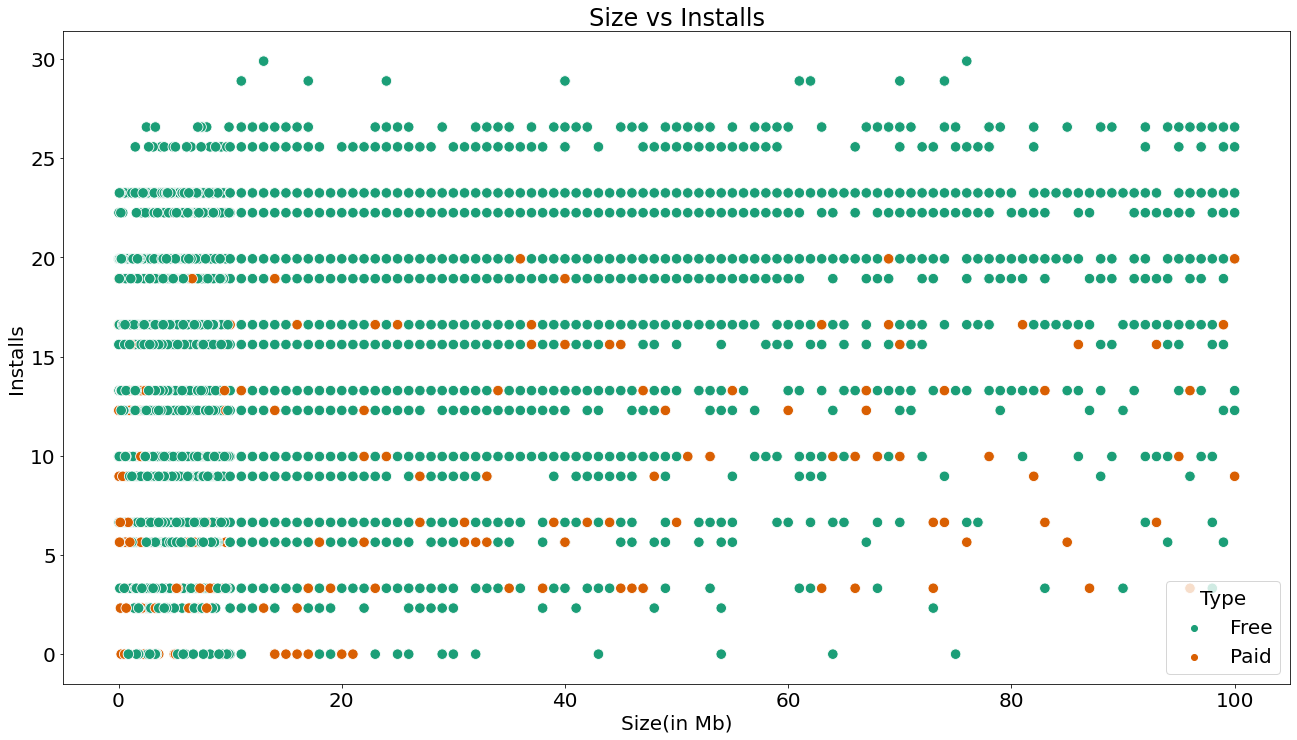

In [57]:
#Size vs Installs relation using scatterplot
plt.rcParams['figure.figsize'] = (22,12) # figure size
# performing numerical-numerical bivariate analysis using scatterplot and seaborn on the basis of 'Type' column
sns.scatterplot(x='Size(in Mb)', y='Normalized_Installs', hue='Type', data=play_df, palette='Dark2',s=110)
plt.title('Size vs Installs'); # title
plt.ylabel('Installs'); # y axis label

**From the above scatterplot we can conclude that 'Installs' and 'Size' are inversely proportional to each other because as the size of app increases the number of installs decreases, we can clearly see that after size 40mb the density of Installs is decreasing in case of both free and paid apps.
From 60mb to 100mb we can notice extremly low density of installs.**

**The most dense area of this scatterplot is between 0mb-10mb , this range of apps have the most chances of being installed.**

**So Devs should focus on building apps with smaller sizes.**

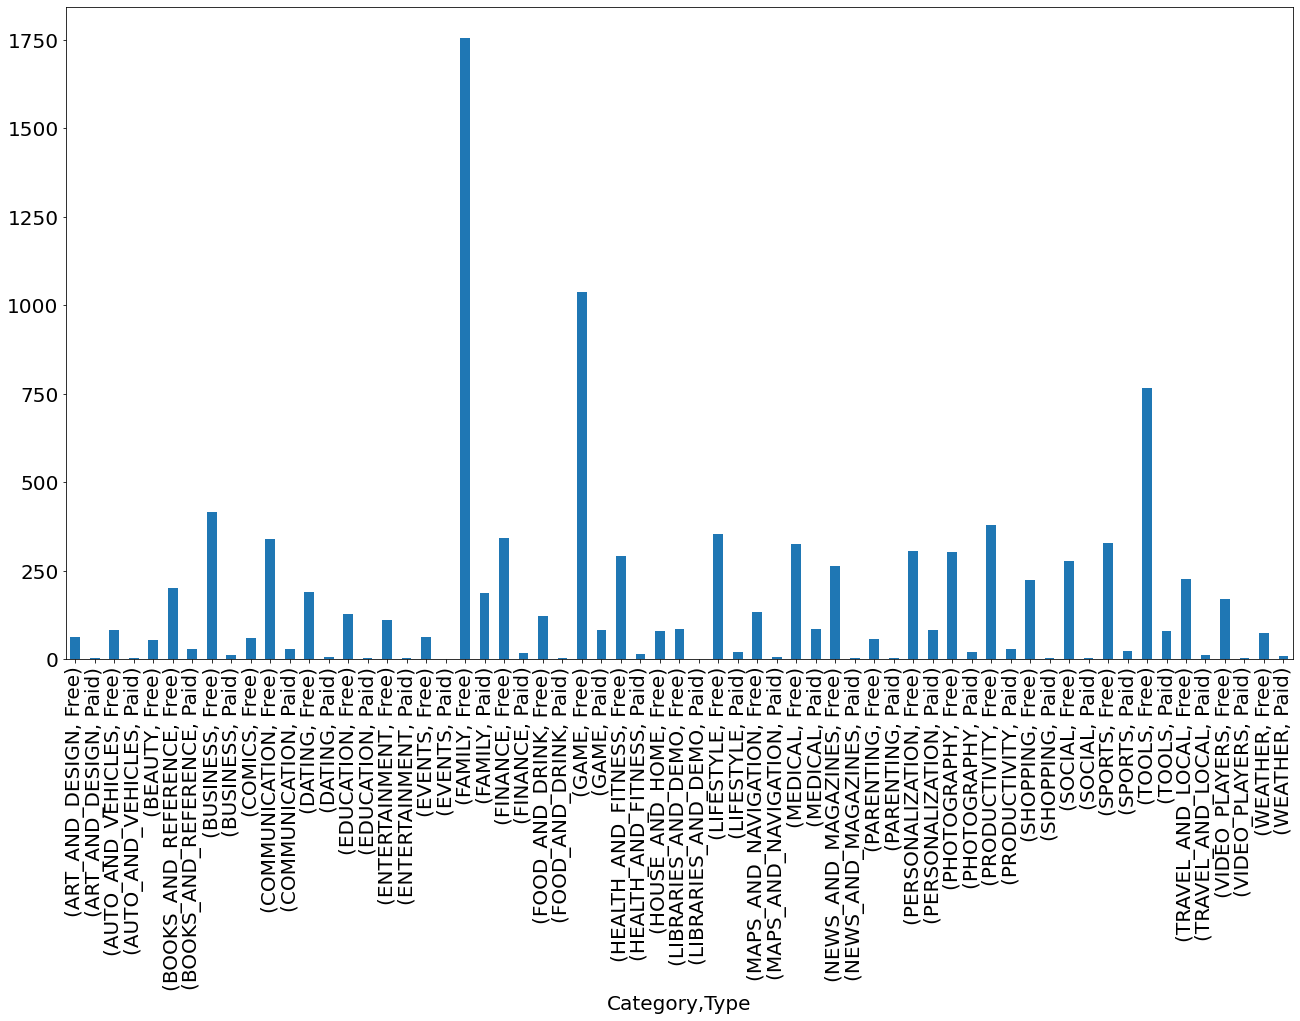

In [74]:
play_df.groupby('Category')['Type'].value_counts().plot(kind='bar')